# 2021 Capital BikeShare Data Exploration and Visualization
### by Stimson




## Dataset Overview
>The dataset used for this exploratory analysis consists of monthly individual trip data from January 2021 to December 2021 in CSV format covering the greater Washington DC Metro Area, raw data is available [here](https://s3.amazonaws.com/capitalbikeshare-data/index.html). Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.
+ Duration – Duration of trip
+ Start Date – Includes start date and time
+ End Date – Includes end date and time
+ Start Station – Includes starting station name and number
+ End Station – Includes ending station name and number
+ Bike Number – Includes ID number of bike used for the trip
+ Member Type – Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass)
This data has been processed to remove trips that are taken by staff as they service and inspect the system, trips that are taken to/from any of our “test” stations at our warehouses and any trips lasting less than 60 seconds (potentially false starts or users trying to re-dock a bike to ensure it's secure).

*NOTE: The 3-Day Membership replaced the 5-Day Membership in Fall 2011*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
plt_df = pd.read_csv('fordgobike_2021_cleaned.csv')

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
plt_df['weekday'] = plt_df['weekday'].astype(weekdaycat)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
plt_df['month'] = plt_df['month'].astype(monthcat)

plt_df.head()

,rideable_type,start_station_name,end_station_name,member_casual,travel_duration_in_mins,start_date,hour_of_day,weekday,month,travel_distance
0,classic bike,Massachusetts Ave & Dupont Circle NW,22nd & P ST NW,member,2.0,2021-06-18,10,Friday,June,0.38
1,classic bike,Tenleytown / Wisconsin Ave & Albemarle St NW,Roosevelt Island,member,20.0,2021-06-11,20,Friday,June,5.77
2,classic bike,20th St & Virginia Ave NW,34th & Water St NW,member,8.0,2021-06-04,16,Friday,June,2.18
3,classic bike,14th St & New York Ave NW,5th & K St NW,member,7.0,2021-06-01,17,Tuesday,June,1.16
4,classic bike,Florida Ave & R St NW,5th & K St NW,member,8.0,2021-06-18,9,Friday,June,1.17


## User type and their Weekly usage
<font color='grey'>People who are</font> **members contribue to the majority of the bike about 63%, while only 37% of the rides were consumed by casual user.** <font color='grey'>Members and Casual users ride mostly on weekends. </font> 

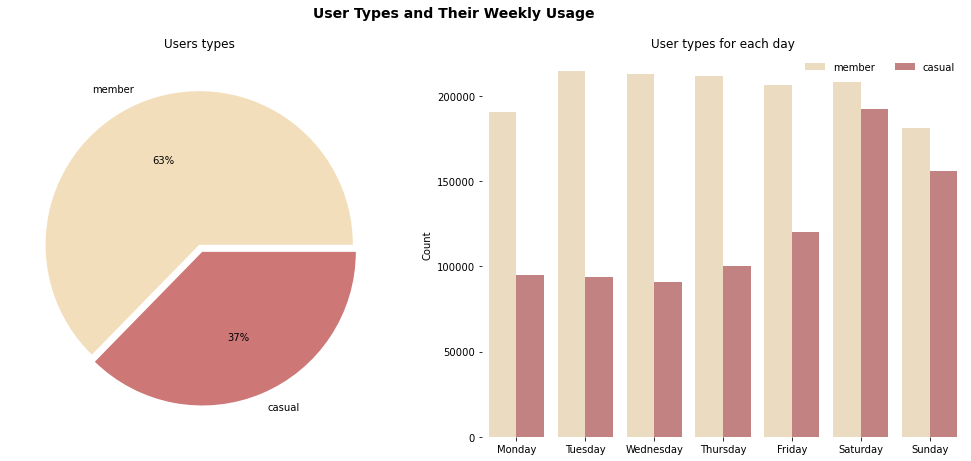

In [3]:
fig, ax = plt.subplots(1,2)

# Setting title and extra params
plt.suptitle('User Types and Their Weekly Usage', fontsize=14, fontweight='semibold', y=1.015);
cols = ['#F2DEBA', '#CE7777']
explode = [0, 0.05]

# Setting figure size
ax[0].figure.set_size_inches(14.70, 6.27)
plt.tight_layout()

# Plotting user types
ax[0].pie(plt_df['member_casual'].value_counts(), labels =plt_df['member_casual'].value_counts().index , autopct='%.0f%%', explode=explode, colors = cols);
ax[0].set_title('Users types');

# Plotting rides for different users
sns.countplot(data=plt_df, x='weekday', hue='member_casual', palette=cols, ax=ax[1])
sns.despine(bottom = True, left = True)
ax[1].set_xlabel(None)
ax[1].set_title('User types for each day')
ax[1].set_facecolor(color='white')
ax[1].legend(loc="upper right", ncol=len(plt_df['member_casual'].value_counts().index), frameon = False)
ax[1].set_ylabel('Count');


## Peak hours for each day for different user types
 <font color='grey'>There is a significant difference between the users (Member & Casual).</font> **Members** <font color='grey'>tend to use the</font> **ride mostly during the work days**<font color='grey'> and to be specific </font>**at the end of working hours.(4pm - 6pm). While casual**<font color='grey'> users tend to</font>  **travel mostly in weekends** <font color='grey'>and lesuirely during the </font>**late moring (11 am).**

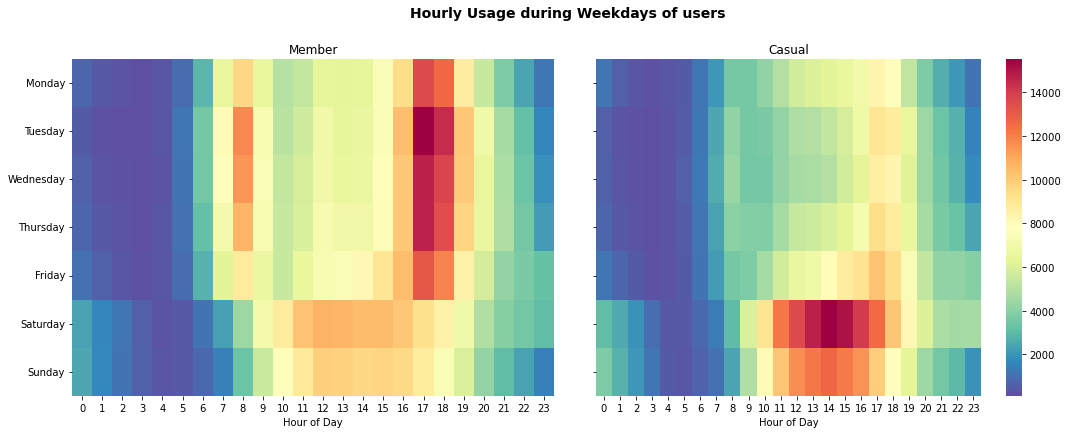

In [4]:
# Filtering data to analysis 95%
plt_df = plt_df[plt_df['travel_duration_in_mins'] <=50]

# Setting figure size and title
fig, ax = plt.subplots(1,2)
ax[0].figure.set_size_inches(14.70, 5.27)
plt.tight_layout()
plt.suptitle('Hourly Usage during Weekdays of users', fontsize=14, fontweight='semibold', y=1.1);


# Hourly usage of Members for all the days of the week
members = plt_df.query('member_casual == "member"')
ct_counts = members.groupby(['weekday', 'hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='weekday', columns='hour_of_day', values='count')
pt = sns.heatmap(ct_counts, cmap='Spectral_r',  cbar=False, ax = ax[0]);
pt.set_yticklabels(pt.get_yticklabels(),rotation=0)
pt.set_title('Member');
pt.set_xlabel('Hour of Day');
pt.set_ylabel(None);

# Hourly usage of Casual users for all the days of the week
casual = plt_df.query('member_casual == "casual"')
st_counts = casual.groupby(['weekday', 'hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='weekday', columns='hour_of_day', values='count')
pt2 = sns.heatmap(st_counts, cmap='Spectral_r', ax = ax[1]);
pt2.set(yticklabels=[])
pt2.set(ylabel=None)
plt.title('Casual');
plt.xlabel('Hour of Day');


## Average distance & time travelled by different users
<font color='grey'>It is clear that</font> **Casual members travel the little more distance than members with more time.** <font color='grey'>while </font>**members are travelling a short distance in a quick amount of time.** <font color='grey'>we should try to minimize the great difference in travel time.</font>

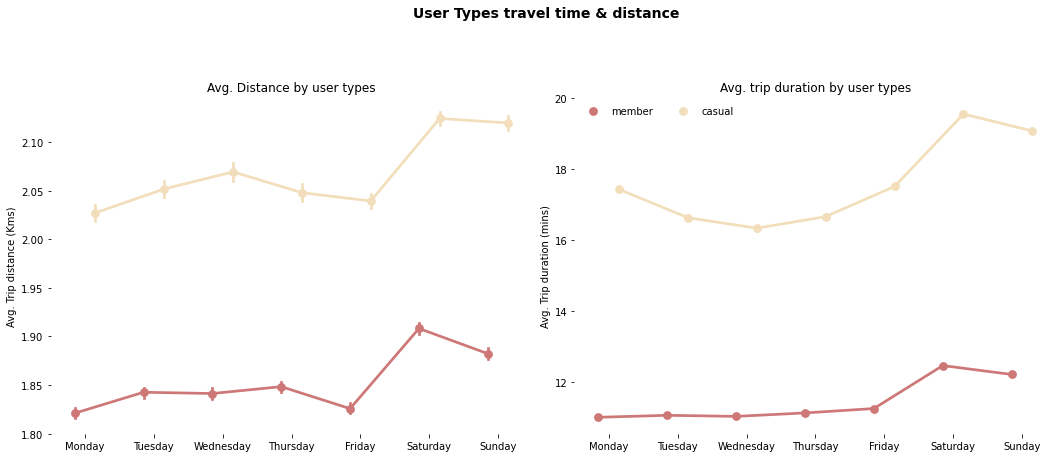

In [5]:
fig, ax = plt.subplots(1,2)

# Setting figure size and title
ax[0].figure.set_size_inches(14.70, 5.27)
plt.tight_layout()
plt.suptitle('User Types travel time & distance', fontsize=14, fontweight='semibold', y=1.2);

# Average distance travelled on all day by different users
sns.pointplot(data=plt_df, x='weekday', y='travel_distance', hue='member_casual', dodge=0.3,ax=ax[0], palette=['#CE7777', '#F2DEBA']);
ax[0].legend([],[], frameon= False)
ax[0].set_facecolor(color='white')
ax[0].set_xlabel(None);
ax[0].set_ylabel('Avg. Trip distance (Kms)');
ax[0].set_title('Avg. Distance by user types');

# Average time travelled on all day by different users
sns.pointplot(data=plt_df, x='weekday', y='travel_duration_in_mins', hue='member_casual', dodge=0.3,ax=ax[1],palette=['#CE7777', '#F2DEBA'] );
ax[1].legend(loc="upper left", ncol=len(plt_df['member_casual'].value_counts().index), frameon = False)
ax[1].set_facecolor(color='white')
ax[1].set_xlabel(None);
ax[1].set_ylabel('Avg. Trip duration (mins)');
ax[1].set_title('Avg. trip duration by user types');

sns.despine(bottom = True, left = True)

## Bike rides and usage pattern
<font color='grey'>Eventhough</font> **classic bike rides are the most used** <font color='grey'>they are used</font>**to travel a short distance around 1.8Km** .<font color='grey'>whereas </font>**electric bikes are used for longer rides i.e. approximately 2.6Km**

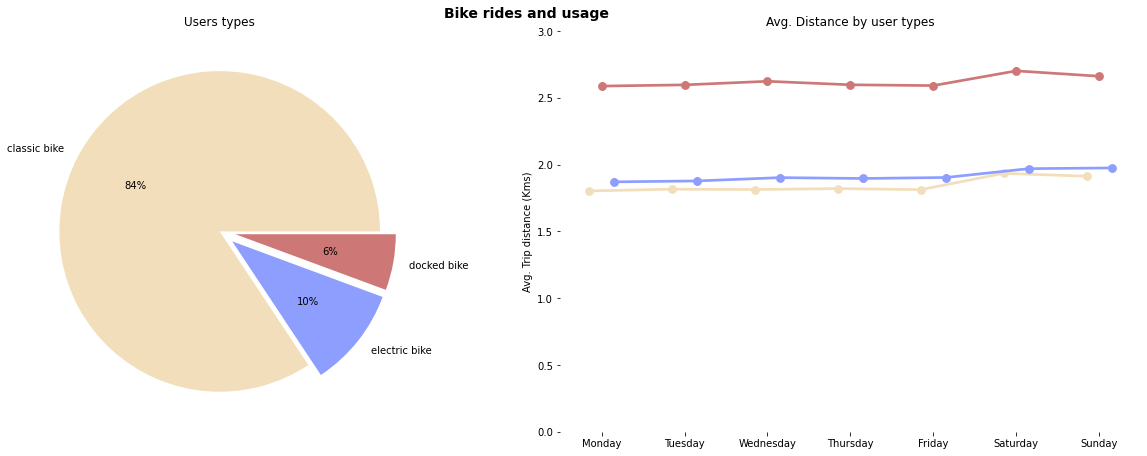

In [6]:
fig, ax = plt.subplots(1,2)

# Setting figure size, aesthetic params and title
ax[0].figure.set_size_inches(14.70, 5.27)
plt.tight_layout()
plt.suptitle('Bike rides and usage', fontsize=14, fontweight='semibold', y=1.015);
cols = ['#F2DEBA', '#8D9EFF','#CE7777']
explode = [0, 0.1,0.1]

# Different rides by the users
ax[0].pie(plt_df['rideable_type'].value_counts(), labels =plt_df['rideable_type'].value_counts().index , autopct='%.0f%%', explode=explode, colors = cols);
ax[0].figure.set_size_inches(14.70, 9.27)
ax[0].set_title('Users types');

# Average distance covered by different rides on all day
sns.pointplot(data=plt_df, x='weekday', y='travel_distance', hue='rideable_type', dodge=0.3, palette = ['#F2DEBA', '#CE7777' , '#8D9EFF'], ax = ax[1])
ax[1].set_facecolor(color='white')
ax[1].figure.set_size_inches(17.70, 6.27)
ax[1].set_ylim(0,3)
ax[1].set_xlabel(None);
ax[1].set_ylabel('Avg. Trip distance (Kms)');
ax[1].set_title('Avg. Distance by user types');
sns.despine(bottom = True, left = True)
plt.legend([],[], frameon=False)
plt.show()


## Summary
+ The usage pattern varies between the users i.e., Member & Casual. As most of the trips in th weekdays are taken up by the members and a massive increase in casual users during the weeked. 
+ On the weekdays the most of the trips at the end of working hours. On the weekend the peak hours is between 11 am - 4pm which clearly indicates those are casual ride takes by both the users. 


+ For long trips electric bikes are preferred over the classic bikes
+ We see stable number of trips taken by members on both weekdays and weekends. 

In [7]:
!jupyter nbconvert fordgobike_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook fordgobike_slide_deck.ipynb to slides
[NbConvertApp] Writing 743410 bytes to fordgobike_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/fordgobike_slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted
